Memanggil dataset dari UCI repository :

In [440]:
# !pip install ucimlrepo
# import pandas as pd
# from ucimlrepo import fetch_ucirepo

# # Fetch dataset
# support2 = fetch_ucirepo(id=880)

# # Gabungkan fitur dan target dalam satu DataFrame
# df = pd.concat([support2.data.features, support2.data.targets], axis=1)

Jika sudah mempunyai datasetnya berupa csv, pakai kode di bawah ini :

In [441]:
import pandas as pd
df = pd.read_csv('support2.csv') #Sesuaikan nama file

Jika sudah dipanggil dan dimasukkan ke dalam pandas dataframe, maka bisa langsung dilakukan Preprocesing.

# Data Cleaning

Data cleaning :

1.   Inconsisten data -> ubah tipe ke yg sesuai.
2.   Missing data -> mengatasi data yang hilang.
3.   Data duplikat -> mengatasi data duplikat.

## Fill-in Value

Beberapa fitur sudah ada memiliki nilai standar bersumber dari the HBiostat Repository yang dimana value tersebut sudah dipakai dan telah teruji di beberapa kasus medis.

In [442]:
df['crea'] = df['crea'].fillna(1.01)
df['bun'] = df['bun'].fillna(6.51)
df['wblc'] = df['wblc'].fillna(9)

## Ubah type data

Ada beberapa fitur yang tipe datanya tidak sesuai, disesuaikan dulu untuk pemprosesan lebih lanjut sesuai dengan ketentuan dan tujuan fiturnya.

In [443]:
df['sex'] = df['sex'].astype('category')
df['dzgroup'] = df['dzgroup'].astype('category')
df['dzclass'] = df['dzclass'].astype('category')
df['edu'] = df['edu'].astype('category')
df['income'] = df['income'].astype('category')
df['race'] = df['race'].astype('category')
df['ca'] = df['ca'].astype('category')
df['dnr'] = df['dnr'].astype('category')
df['adlp'] = df['adlp'].astype('category')
df['death'] = df['death'].astype('int')
df['num.co'] = df['num.co'].astype('float')
df['prg6m'] = df['prg6m'].astype('float')

Sekarang cek apakah semua fitur sudah memiliki tipe yang sesuai dengan ketentuan.

In [444]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9105 entries, 0 to 9104
Data columns (total 48 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   id        9105 non-null   int64   
 1   age       9105 non-null   float64 
 2   death     9105 non-null   int64   
 3   sex       9105 non-null   category
 4   hospdead  9105 non-null   int64   
 5   slos      9105 non-null   int64   
 6   d.time    9105 non-null   int64   
 7   dzgroup   9105 non-null   category
 8   dzclass   9105 non-null   category
 9   num.co    9105 non-null   float64 
 10  edu       7471 non-null   category
 11  income    6123 non-null   category
 12  scoma     9104 non-null   float64 
 13  charges   8933 non-null   float64 
 14  totcst    8217 non-null   float64 
 15  totmcst   5630 non-null   float64 
 16  avtisst   9023 non-null   float64 
 17  race      9063 non-null   category
 18  sps       9104 non-null   float64 
 19  aps       9104 non-null   float64 
 20  surv2m  

Jika sudah, maka dataset bisa dipakai ke tahap selanjutnya.

## Drop fitur

Agar tidak menggangu proses kedepannya, mendrop semua fitur yang dirasi tidak ada korelasi dengan sesama fitur dan target yang dituju.

In [445]:
df.drop(columns=['edu'], inplace=True) #tidak ada korelasi dan tidak bisa dipredik valuenya
df.drop(columns=['income'], inplace=True) #tidak bisa dipredik valuenya
df.drop(columns=['race'], inplace=True) #tidak ada korelasi dan tidak bisa dipredik valuenya
df.drop(columns=['charges'], inplace=True) #tidak ada korelasi
df.drop(columns=['totcst'], inplace=True) #tidak ada korelasi
df.drop(columns=['totmcst'], inplace=True) #tidak ada korelasi
df.drop(columns=['avtisst'], inplace=True) #tidak ada korelasi
df.drop(columns=['hday'], inplace=True) #tidak bisa dipredik valuenya
df.drop(columns=['adlp'], inplace=True) #60% missing data, dan tidak bisa dipredik valuenya
df.drop(columns=['adls'], inplace=True) #sudah disediakan fitur pengganti (adlsc)
df.drop(columns=['id'], inplace=True)
df.drop(columns=['hospdead'], inplace=True)
df.drop(columns=['sfdm2'], inplace=True)

## Cek jumlah missing value

Selanjutnya adalah mengatasi missing value. Untuk mengatasi hal tersebut, akan dicek dulu berapa persen kah missing value yang terdapat pada setiap fitur.

In [446]:
missing_values = df.isnull().mean() * 100
print(missing_values)

age          0.000000
death        0.000000
sex          0.000000
slos         0.000000
d.time       0.000000
dzgroup      0.000000
dzclass      0.000000
num.co       0.000000
scoma        0.010983
sps          0.010983
aps          0.010983
surv2m       0.010983
surv6m       0.010983
diabetes     0.000000
dementia     0.000000
ca           0.000000
prg2m       18.110928
prg6m       17.935200
dnr          0.329489
dnrday       0.329489
meanbp       0.010983
wblc         0.000000
hrt          0.010983
resp         0.010983
temp         0.010983
pafi        25.535420
alb         37.034596
bili        28.566722
crea         0.000000
sod          0.010983
ph          25.085118
glucose     49.423394
bun          0.000000
urine       53.399231
adlsc        0.000000
dtype: float64


Karena merasa fitur "dnr" dan "dnrday" sangat penting tetapi value tersebut tidak ada fitur yang berkorelasi untuk dapat dicari missing valuenya (tidak dapat diprediksi), maka diputuskan untuk drop baris yang memiliki missing value pada fitur tersebut.

In [447]:
df = df.dropna(subset=['dnr', 'dnrday'])

Untuk menentukan cara mengatasi missing value yang ada, harus terlebih dahulu mencek pesebaran dari missing value tersebut. Untuk kasus ini memakai plot pesebaran agar bisa tau apakah missing value nya MAR, MCAR, atau MNAR.

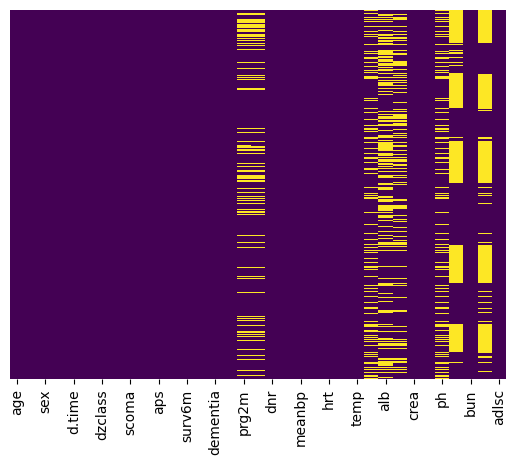

In [448]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.isnull(), cmap="viridis", cbar=False, yticklabels=False)
plt.show()

Dilihat dari plot persebaran missing value tersebut, bisa diasumsikan bahwa missing value-nya merupakan MAR (Missing At Random). <br>Karena missing value-nya merupakan MAR, bisa dilakukan metode imputer untuk mengatasi missing value tersebut.

## Plot

Sebelum melakukan imputer, harus terlebih dahulu melihat bagaimana data tersebut berdistribusi.

Distribusi fitur numerik :

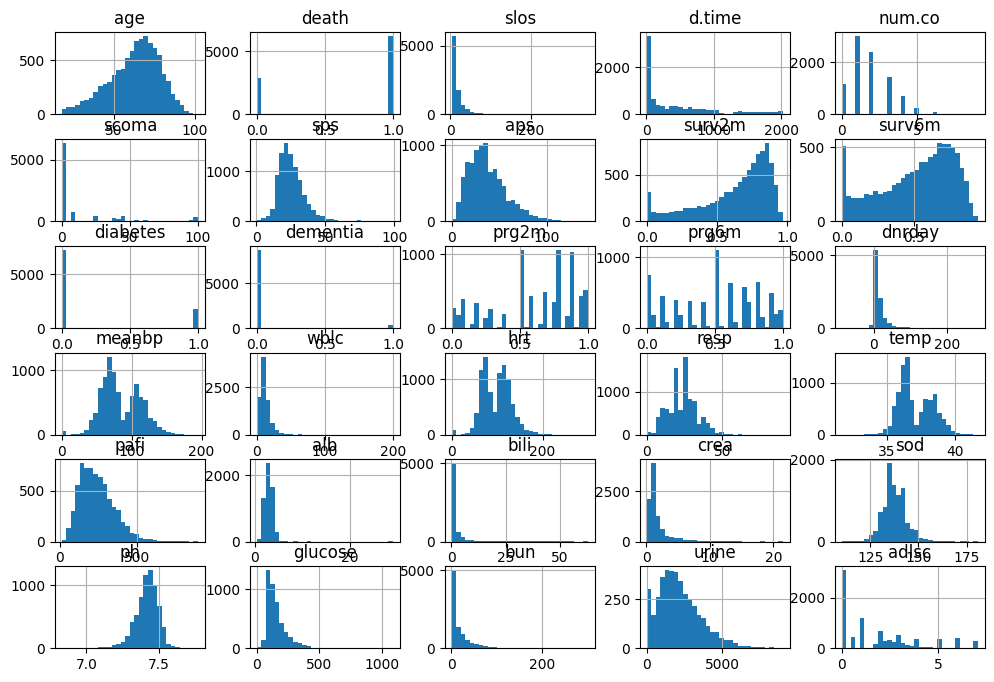

In [449]:
df.hist(figsize=(12, 8), bins=30)
plt.show()

Dari histogram tersebut, bisa dilihat sebagian besar fiturnya berdistribusi skewed (kebanyakan left-skewed) tetapi ada juga yang mendekati normal. Pada beberapa fitur ada 1 value yang mendominasi (tinggi), hal tersebut terjadi karena digunakannya fill-in value di awal. Hal tersebut bisa diwajarkan karena value yang dipakai memang merupakan nilai standar yang telah teruji. <br>Untuk outlier, kami memutuskan untuk menyimpan nilai-nilai ekstrim karena berasumsi bahwa nilai tersebut memang ada nya dan bukan merupakan outlier.

Distribusi fitur kategori :

<ipython-input-450-3becdeb43b88>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="pastel", ax=axes[i])
<ipython-input-450-3becdeb43b88>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="pastel", ax=axes[i])
<ipython-input-450-3becdeb43b88>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="pastel", ax=axes[i])
<ipython-input-450-3becdeb43b88>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` v

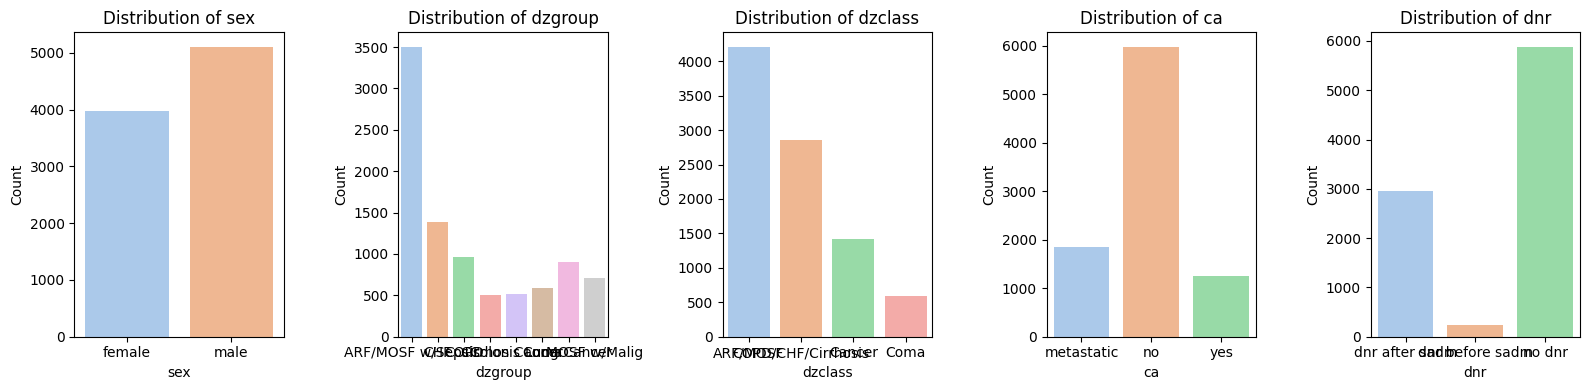

In [450]:
var_cat = ['sex', 'dzgroup', 'dzclass',  'ca', 'dnr']

fig, axes = plt.subplots(1, len(var_cat), figsize=(16, 4))

for i, col in enumerate(var_cat):
    sns.countplot(data=df, x=col, palette="pastel", ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

Dari histogram tersebut, bisa dilihat tidak terdapat outlier. Walaupun pada beberapa fitur, distribusi kategorinya ada yang tidak merata. Karena terbukti sudah aman, bisa dilanjutkan ke proses selanjutnya.

## Encoding

Sebelum melakukan imputer, harus terlebih dahulu encoding fitur-fitur kategori agar label nya diubah menjadi numerik. Pada kasus ini digunakan 2 metode encoding :

*   Label Encoder : untuk kategori yang memiliki label 2 - 3. Tidak cocok untuk yg memiliki label banyak karena akan digunakan ke KNN.
*   Binary Encoder : untuk kategori yang miliki label > 3. Alternatif lain dari one-hot encoding, tetapi dengan penambahan fitur yang lebih sedikit.

pemilihan metode encoding tersebut berdasarkan dengan metode yang cocok dipakai untuk KNN imputer.

In [451]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
cols = ['sex', 'ca', 'dnr']

df[cols] = df[cols].apply(lambda x: le.fit_transform(x))

In [452]:
!pip install category_encoders
import category_encoders as ce

cols = ['dzgroup', 'dzclass']

encoder = ce.BinaryEncoder(cols=cols)
df_encoded = encoder.fit_transform(df[cols])
df = pd.concat([df.drop(columns=cols), df_encoded], axis=1)

Memeriksa apakah masih ada terdapat fitur yang belum menjadi numerik.

In [453]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9075 entries, 0 to 9104
Data columns (total 40 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        9075 non-null   float64
 1   death      9075 non-null   int64  
 2   sex        9075 non-null   int64  
 3   slos       9075 non-null   int64  
 4   d.time     9075 non-null   int64  
 5   num.co     9075 non-null   float64
 6   scoma      9075 non-null   float64
 7   sps        9075 non-null   float64
 8   aps        9075 non-null   float64
 9   surv2m     9075 non-null   float64
 10  surv6m     9075 non-null   float64
 11  diabetes   9075 non-null   int64  
 12  dementia   9075 non-null   int64  
 13  ca         9075 non-null   int64  
 14  prg2m      7430 non-null   float64
 15  prg6m      7446 non-null   float64
 16  dnr        9075 non-null   int64  
 17  dnrday     9075 non-null   float64
 18  meanbp     9074 non-null   float64
 19  wblc       9075 non-null   float64
 20  hrt        90

Jika semua fitur telah diubah menjadi numerik, maka sudah bisa dilakukan imputasi menggunakan KNN imputer.

## KNN Imputer

Setelah melakukan encoding, bisa dilanjutkan dengan menggunakan imputer. Disini menggunakan KNN imputer, yaitu metode imputasi dengan mencari tetangga yang paling dekat. <br>Disini kami menggunakan KNN imputer dengan parameter n = 10 dan weight = distance.

In [454]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=10, weights="distance")
df_imputed = imputer.fit_transform(df)
df_imputed = pd.DataFrame(df_imputed, columns=df.columns)

Karena sudah tidak ada missing value, mengubah tipe data yg seharusnya bertipe integer :

In [455]:
df_imputed['glucose'] = df_imputed['glucose'].astype('int')
df_imputed['bun'] = df_imputed['bun'].astype('int')
df_imputed['urine'] = df_imputed['urine'].astype('int')

Melihat distribusi data setelah dilakukannya imputasi.

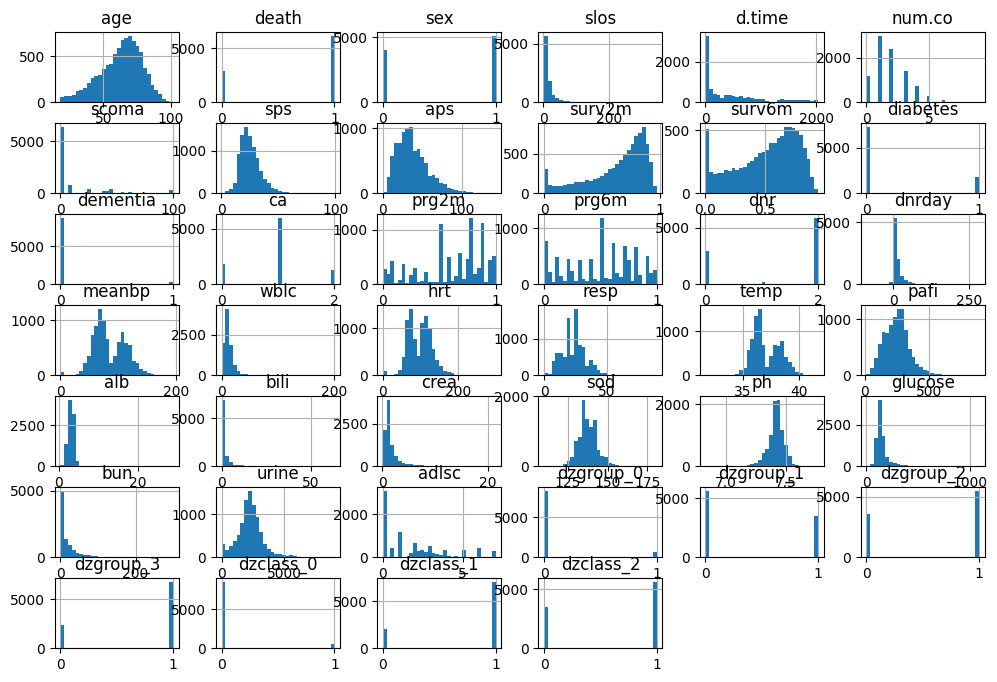

In [456]:
df_imputed.hist(figsize=(12, 8), bins=30)
plt.show()

Bisa dilihat dari histogram berikut, bahwa distribusi sebelum dan setelah imputasi tidak terlalu jauh berbeda, yang berarti imputasi berjalan lancar dan tidak mengubah karakteristik dari data fitur tersebut.

## Evaluasi



Plot untuk memeriksa perbedaan distribusi sebelum imputasi dan setelah imputasi. Hal ini bertujuan untuk mengetahui apakah imputasi ada melakukan perubahan pada distribusi datanya.

<Axes: >

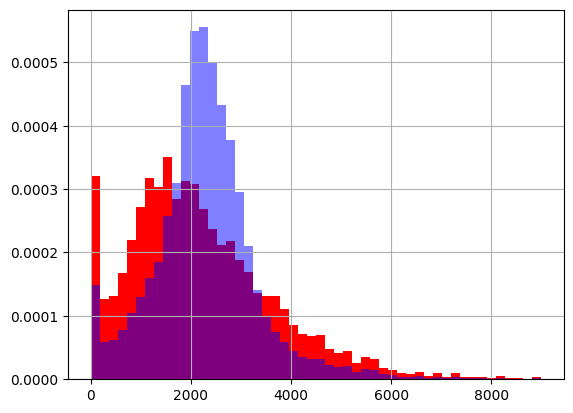

In [457]:
fig = plt.figure()
ax = fig.add_subplot(111)

df['urine'].hist(bins=50, ax=ax, density=True, color='red')
df_imputed['urine'].hist(bins=50, ax=ax, color='blue', density=True, alpha=0.5)

Bisa dilihat pada plotnya bahwa distribusi data setelah imputasi tidak jauh beda dari distribusi saat sebelum imputasi.

Setelah memutuskan bahwa imputasi berhasil, maka data cleaning telah selesai. Selanjutnya dataset akan digunakan untuk memprosesan lebih lanjut.

# Data Transforming

Data Transforming :

1.   Encoding -> buat fitur kategori.
2.   Normalisasi -> buat fitur numerik.





## Normalisasi

Karena nanti kedepannya akan digunakan Feature Selection menggunakan Chi-Square, maka akan menggunakan metode MinMax karena Chi-Square tidak bisa menangani nilai negatif.

In [458]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_imputed), columns=df_imputed.columns)

Setelah sudah dinormalisasi, bisa dilanjutkan ke proses reduksi.

# Data Reduction

Data Reduction ada :

1.   Fitur Selection
2.   PCA
3.   Sampling

## Feature Selection

Memilih fitur yang berpengaruh dengan menggunakan uji Chi-Square untuk fitur numerik dan uji ANOVA untuk fitur kategori, dengan threshold score = 5 dan p-value = 0.01.

In [463]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.preprocessing import LabelEncoder
import pandas as pd

X = df_scaled.drop(columns=['death'])
y = df_scaled['death']

chi2_features = ['sex', 'ca', 'dnr', 'dzgroup_0', 'dzgroup_1', 'dzgroup_2', 'dzgroup_3', 'dzclass_0', 'dzclass_1', 'dzclass_2']
f_classif_features = [col for col in X.columns if col not in chi2_features]

X_encoded = X.copy()
for feature in chi2_features:
    X_encoded[feature] = LabelEncoder().fit_transform(X_encoded[feature])

chi2_selector = SelectKBest(score_func=chi2, k='all')
chi2_scores, chi2_p_values = chi2(X_encoded[chi2_features], y)

f_classif_selector = SelectKBest(score_func=f_classif, k='all')
f_scores, f_p_values = f_classif(X_encoded[f_classif_features], y)

chi2_results = {f: (s, p) for f, s, p in zip(chi2_features, chi2_scores, chi2_p_values)}
f_classif_results = {f: (s, p) for f, s, p in zip(f_classif_features, f_scores, f_p_values)}

feature_results = {**chi2_results, **f_classif_results}
sorted_features = sorted(feature_results.items(), key=lambda x: x[1][0], reverse=True)

print("\nFitur terpilih berdasarkan Chi-Square dan ANOVA F-test:")
for feature, (score, p_value) in sorted_features:
    print(f"{feature}: Score = {score:.4f}, p-value = {p_value:.4f}")

score_threshold = 5.0
p_value_threshold = 0.01

selected_features = [feature for feature, (score, p_value) in sorted_features if score > score_threshold and p_value < p_value_threshold]
df_selected = df_scaled[selected_features + ['death']]


Fitur terpilih berdasarkan Chi-Square dan ANOVA F-test:
d.time: Score = 9263.3520, p-value = 0.0000
prg6m: Score = 1825.1427, p-value = 0.0000
surv6m: Score = 1509.0341, p-value = 0.0000
prg2m: Score = 1147.8407, p-value = 0.0000
surv2m: Score = 1065.3944, p-value = 0.0000
dnr: Score = 849.0425, p-value = 0.0000
age: Score = 297.8542, p-value = 0.0000
aps: Score = 227.4682, p-value = 0.0000
sps: Score = 225.4288, p-value = 0.0000
adlsc: Score = 224.0497, p-value = 0.0000
dnrday: Score = 199.4291, p-value = 0.0000
scoma: Score = 170.0642, p-value = 0.0000
dzgroup_0: Score = 167.2407, p-value = 0.0000
dzgroup_2: Score = 104.2943, p-value = 0.0000
dzclass_1: Score = 90.1727, p-value = 0.0000
slos: Score = 63.8419, p-value = 0.0000
dzgroup_3: Score = 60.9989, p-value = 0.0000
ca: Score = 47.2796, p-value = 0.0000
dzclass_0: Score = 46.4641, p-value = 0.0000
num.co: Score = 44.1953, p-value = 0.0000
bun: Score = 36.6116, p-value = 0.0000
urine: Score = 29.8279, p-value = 0.0000
bili: Score

## Cek imbalance

Setelah mengambil fitur yang penting sesuai uji yang dilakukan, selanjut mencek apakah datasetnya balance atau tidak pada target "death".

In [464]:
print(df_selected["death"].value_counts())

death
1.0    6181
0.0    2894
Name: count, dtype: int64


Karena class pada target "death" imbalance (jumlah data kelas 1 lebih banyak daripada jumlah data kelas 0), maka harus dilakukan sampling.

## Sampling

Menggunakan Oversampling yang dimana menambah data pada class minoritas agar menyamai jumlah data pada class mayoritas. <br>Oversampling dipilih agar tidak menghilangkan informasi penting yang ada pada class mayoritas. <br>Metode yang digunakan adalah Random Oversamping.

In [465]:
from imblearn.over_sampling import RandomOverSampler

X = df_selected.drop(columns=["death"])
y = df_selected["death"]

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled["death"] = y_resampled
print(pd.Series(y_resampled).value_counts())

death
0.0    6181
1.0    6181
Name: count, dtype: int64


Dengan ini, dataset sudah balance dan bisa digunakan ke dalam model Machine Learning.

## PCA

Memeriksa terlebih dahulu apakah korelasi antar fitur sangat tinggi atau tidak.

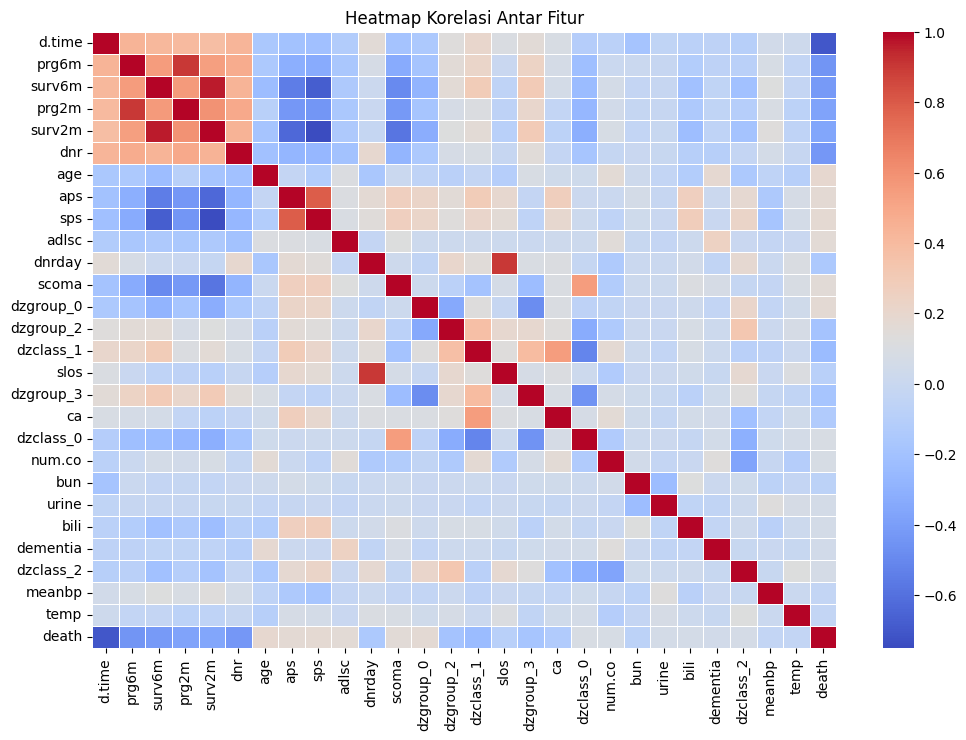

In [468]:
corr_matrix = df_resampled.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=False, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap Korelasi Antar Fitur")
plt.show()

Karena korelasi antar fitur tidak terlalu tinggi satu sama lain, maka diputuskan untuk tidak menggunakan PCA.

Setelah semua sudah selesai, maka dataset sudah Clean dan bisa dilanjutkan ke dalam model Machine Learning.

# Modeling

Melakukan klasifikasi dengan menggunakan KNN pada target "death" dengan n = 8.

              precision    recall  f1-score   support

         0.0       0.87      0.96      0.92      1196
         1.0       0.96      0.87      0.91      1277

    accuracy                           0.92      2473
   macro avg       0.92      0.92      0.92      2473
weighted avg       0.92      0.92      0.92      2473



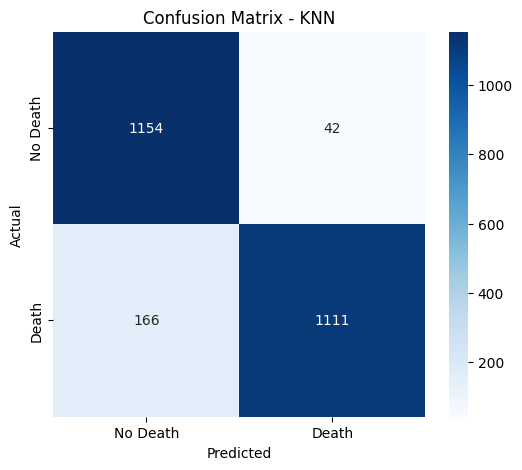

In [466]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

X = df_resampled.drop(columns=["death"])
y = df_resampled["death"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=8, weights='distance')
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print(classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No Death", "Death"], yticklabels=["No Death", "Death"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - KNN")
plt.show()

Confusion matrix :
- 1153 (True Negative) dimana model benar memprediksi "No Death" sebagai "No Death"
- 1108 (True Positive) dimana model benar memprediksi "death" seebagai "Death"
- 169 (False Negative) dimana model salah memprediksi "Death" sebagai "No Death"
- 43 (False Positive) dimana model salah memprediksi "No Death" sebagai "Death"

Bisa disimpulkan bahwa model ini sudah bisa mengklasifikasi dengan baik, tetapi tidak terlalu bisa untuk mengklasifikasi pada class 1 (death, recall = 87%).